Below is code with a link to a happy or sad dataset which contains 80 images, 40 happy and 40 sad. 
Create a convolutional neural network that trains to 100% accuracy on these images,  which cancels training upon hitting training accuracy of >.999

Hint -- it will work best with 3 convolutional layers.

In [3]:
import tensorflow as tf
import os
import zipfile
from os import path, getcwd, chdir

# DO NOT CHANGE THE LINE BELOW. If you are developing in a local
# environment, then grab happy-or-sad.zip from the Coursera Jupyter Notebook
# and place it inside a local folder and edit the path to that location
path = f"{getcwd()}/../tmp2/happy-or-sad.zip"

zip_ref = zipfile.ZipFile(path, 'r')
zip_ref.extractall("/tmp/h-or-s")
zip_ref.close()
tf.__version__

'1.14.0'

In [13]:
# Directory with our training horse pictures
train_sad_dir = os.path.join('/tmp/h-or-s/sad')

# Directory with our training human pictures
train_happy_dir = os.path.join('/tmp/h-or-s/happy')


train_sad_names = os.listdir(train_sad_dir)
print(train_sad_names[:10])

train_happy_names = os.listdir(train_happy_dir)
print(train_happy_names[:10])




['sad1-08.png', 'sad2-03.png', 'sad1-16.png', 'sad2-11.png', 'sad1-06.png', 'sad1-17.png', 'sad1-18.png', 'sad2-10.png', 'sad1-09.png', 'sad2-19.png']
['happy1-05.png', 'happy2-06.png', 'happy1-04.png', 'happy2-16.png', 'happy1-16.png', 'happy1-15.png', 'happy2-02.png', 'happy1-19.png', 'happy1-14.png', 'happy2-03.png']


In [15]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

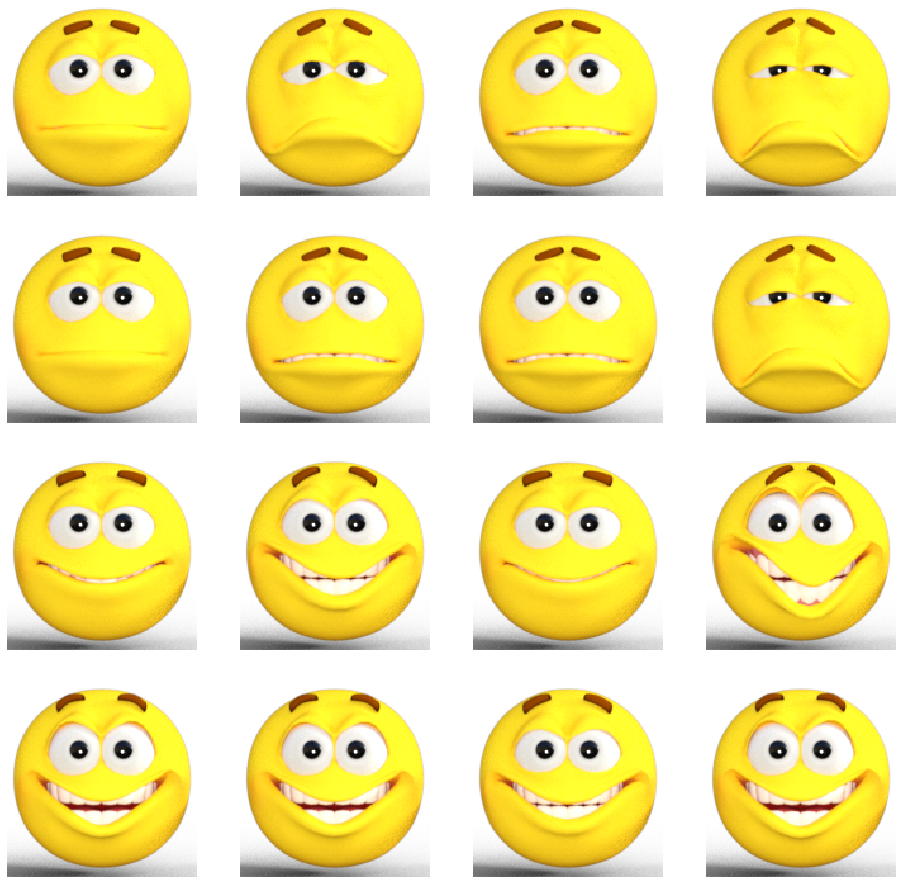

In [16]:

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_sad_dir, fname) 
                for fname in train_sad_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_happy_dir, fname) 
                for fname in train_happy_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [13]:
# GRADED FUNCTION: train_happy_sad_model
def train_happy_sad_model():
    # Please write your code only where you are indicated.
    # please do not remove # model fitting inline comments.

    DESIRED_ACCURACY = 0.999

    class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs = {}):
            if logs.get('acc') >= DESIRED_ACCURACY:
                print("Stop training reached acc 0.999")
                self.model.stop_training = True

    callbacks = myCallback()
    
    # This Code Block should Define and Compile the Model. Please assume the images are 150 X 150 in your implementation.
    model = tf.keras.models.Sequential([
        # Your Code Here
        tf.keras.layers.Conv2D(64,(3,3), activation = 'relu', input_shape = (150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        
        tf.keras.layers.Conv2D(32,(3,3), activation = 'relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        
        tf.keras.layers.Conv2D(16,(3,3), activation = 'relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(508, activation = 'relu'),
        #tf.keras.layers.Dense(128, activation = 'relu'),
        tf.keras.layers.Dense(1, activation = 'sigmoid')


    ])

    from tensorflow.keras.optimizers import RMSprop
    
    # Your Code Here #)
    model.compile(optimizer = RMSprop(lr = 0.001), loss = "binary_crossentropy",
                  metrics = ["accuracy"])
                  
        

    # This code block should create an instance of an ImageDataGenerator called train_datagen 
    # And a train_generator by calling train_datagen.flow_from_directory

    from tensorflow.keras.preprocessing.image import ImageDataGenerator

    train_datagen = ImageDataGenerator(rescale = 1/250)
    
    # Your Code Here

    # Please use a target_size of 150 X 150.
    train_generator = train_datagen.flow_from_directory("/tmp/h-or-s", 
                                                        target_size = (150, 150), 
                                                        batch_size = 10, 
                                                        class_mode = 'binary')
        # Your Code Here)
    # Expected output: 'Found 80 images belonging to 2 classes'

    # This code block should call model.fit_generator and train for
    # a number of epochs.
    # model fitting
    history = model.fit_generator(train_generator, steps_per_epoch = 8, epochs = 15, verbose = 1, callbacks = [callbacks])
          # Your Code Here)
    # model fitting
    return history.history['acc'][-1]

In [14]:
# The Expected output: "Reached 99.9% accuracy so cancelling training!""
train_happy_sad_model()

Found 80 images belonging to 2 classes.
Epoch 1/15
8/8 [==============================] - 1s 162ms/step - loss: 1.1988 - acc: 0.5750
Epoch 2/15
8/8 [==============================] - 0s 39ms/step - loss: 0.7496 - acc: 0.5625
Epoch 3/15
8/8 [==============================] - 0s 51ms/step - loss: 0.5656 - acc: 0.7000
Epoch 4/15
8/8 [==============================] - 0s 49ms/step - loss: 0.3358 - acc: 0.8750
Epoch 5/15
8/8 [==============================] - 0s 50ms/step - loss: 0.5091 - acc: 0.7500
Epoch 6/15
8/8 [==============================] - 0s 49ms/step - loss: 0.1405 - acc: 0.9500
Epoch 7/15
8/8 [==============================] - 0s 39ms/step - loss: 0.1721 - acc: 0.9250
Epoch 8/15
8/8 [==============================] - 0s 49ms/step - loss: 0.0629 - acc: 0.9875
Epoch 9/15
8/8 [==============================] - 0s 48ms/step - loss: 0.0265 - acc: 1.0000


1.0

In [9]:
# Now click the 'Submit Assignment' button above.
# Once that is complete, please run the following two cells to save your work and close the notebook

In [15]:
%%javascript
<!-- Save the notebook -->
IPython.notebook.save_checkpoint();

<IPython.core.display.Javascript object>

In [ ]:
%%javascript
IPython.notebook.session.delete();
window.onbeforeunload = null
setTimeout(function() { window.close(); }, 1000);

<IPython.core.display.Javascript object>